In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=yf.download("MSFT")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060980,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063158,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064247,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062613,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061524,47894400
...,...,...,...,...,...,...
2022-08-31,265.390015,267.109985,261.329987,261.470001,261.470001,24791800
2022-09-01,258.869995,260.890015,255.410004,260.399994,260.399994,23263400
2022-09-02,261.700012,264.739990,254.470001,256.059998,256.059998,22841600


In [3]:
returns=np.log(1+df['Adj Close']).pct_change()

In [4]:
mu,sigma=returns.mean(), returns.std()

In [5]:
sim_rets=np.random.normal(mu,sigma,252)

In [6]:
initial=df['Adj Close'].iloc[-1]
initial

254.80499267578125

In [7]:
sim_price=initial*(sim_rets+1).cumprod()

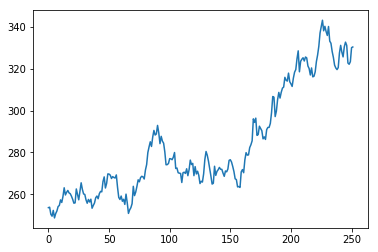

In [8]:
plt.plot(sim_price)

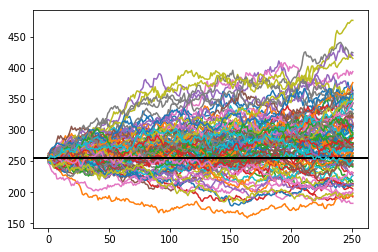

In [9]:
for i in range(100):
    sim_rets=np.random.normal(mu,sigma,252)
    sim_price=initial*(sim_rets+1).cumprod()
    plt.axhline(initial,c='K')
    plt.plot(sim_price)